In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# filename = 'samples.csv'
filename = 'allCases.csv'
pdData = pd.read_csv( filename )
pdData.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S,Classes
0,0.459128,0.037793,-0.005021,0.396483,0.294007,0.264442,0.435411,-0.535314,0.160456,-0.192909,...,-0.375528,-0.512366,0.240621,-0.030798,0.222405,-0.003962,0.357551,0.229804,-0.022661,2
1,-1.984835,-0.010182,0.076412,-0.003169,-0.165882,0.422382,-0.248215,1.018655,-0.348808,0.311840,...,1.489629,0.039887,-0.444673,-0.648194,-0.062418,0.097790,0.434897,0.520602,-0.003774,2
2,1.004902,0.425738,-0.099454,-0.170769,-0.731453,-0.253671,-0.320739,-0.520905,0.544893,-0.382786,...,-0.709330,0.202728,0.147759,0.366219,-0.256029,-0.091443,0.111414,-0.234035,-0.631229,2
3,0.362306,0.170206,-0.120559,-0.103302,0.411346,-0.304337,-0.326257,-0.914469,0.181231,0.207712,...,-0.984980,-0.160732,-0.066951,0.096363,0.278873,0.026118,-0.002167,-0.123767,-0.103869,2
4,-1.503368,-0.474718,0.193406,-0.469004,-0.345926,0.610511,-0.066067,0.441405,-0.357782,0.739501,...,1.240139,1.094079,-0.156186,-0.416933,-1.045043,-0.023955,0.419680,-0.109643,0.438731,2


In [3]:
pdData["Classes"] = pdData["Classes"].replace([2,1], [1,0])
pdData.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S,Classes
0,0.459128,0.037793,-0.005021,0.396483,0.294007,0.264442,0.435411,-0.535314,0.160456,-0.192909,...,-0.375528,-0.512366,0.240621,-0.030798,0.222405,-0.003962,0.357551,0.229804,-0.022661,1
1,-1.984835,-0.010182,0.076412,-0.003169,-0.165882,0.422382,-0.248215,1.018655,-0.348808,0.311840,...,1.489629,0.039887,-0.444673,-0.648194,-0.062418,0.097790,0.434897,0.520602,-0.003774,1
2,1.004902,0.425738,-0.099454,-0.170769,-0.731453,-0.253671,-0.320739,-0.520905,0.544893,-0.382786,...,-0.709330,0.202728,0.147759,0.366219,-0.256029,-0.091443,0.111414,-0.234035,-0.631229,1
3,0.362306,0.170206,-0.120559,-0.103302,0.411346,-0.304337,-0.326257,-0.914469,0.181231,0.207712,...,-0.984980,-0.160732,-0.066951,0.096363,0.278873,0.026118,-0.002167,-0.123767,-0.103869,1
4,-1.503368,-0.474718,0.193406,-0.469004,-0.345926,0.610511,-0.066067,0.441405,-0.357782,0.739501,...,1.240139,1.094079,-0.156186,-0.416933,-1.045043,-0.023955,0.419680,-0.109643,0.438731,1


In [20]:
# centrolize data
data = pdData.values
data, labels = data[:, :-1], data[:,-1]
number_sample, number_features = len(labels), len(data[0])

column_mean = np.mean( data, axis=0 )
print( column_mean.shape )
cenData = data - column_mean
print(cenData)

(8560,)
[[ 0.45912798  0.03787917 -0.00502098 ...,  0.35736266  0.22976549
  -0.0251782 ]
 [-1.98483502 -0.01009583  0.07641202 ...,  0.43470866  0.52056349
  -0.0062912 ]
 [ 1.00490198  0.42582417 -0.09945398 ...,  0.11122566 -0.23407351
  -0.6337462 ]
 ..., 
 [ 0.43986098 -0.02252383 -0.22694498 ...,  0.35140466  0.65890049
  -0.1975022 ]
 [-0.37425302  0.32627917  0.03721002 ...,  0.02460866  0.48554549
   0.1301118 ]
 [-0.10715702 -0.35334583 -0.04344798 ..., -0.01635034 -0.06422351
   0.3063268 ]]


In [63]:
# run PCA and sort eigen values and vectors
comatrix = np.cov(cenData)
# print(comatrix.shape)

eigenValues,eigenVectors = np.linalg.eig( comatrix )
print( eigenValues.shape )

ind = eigenValues.argsort()[::-1]
eigenValues = eigenValues[ind]
eigenVectors = eigenVectors[:, ind]
# sortedLabels = labels[ind]
print( eigenValues.shape, eigenVectors.shape )
print( "eigen Values" )
print( eigenValues )
print( "eigen Vectors" )
print( eigenVectors )
# print("sorted labels")
# print(sortedLabels)

(364,)
(364,) (364, 364)
eigen Values
[  2.25281941e+01   6.44190728e+00   4.13139561e+00   3.48559197e+00
   2.48369507e+00   2.15985264e+00   1.83682614e+00   1.65555264e+00
   1.37216874e+00   1.25606974e+00   1.08438954e+00   9.37034547e-01
   8.40713772e-01   7.98761494e-01   6.67711003e-01   6.36763643e-01
   5.81773769e-01   5.52635874e-01   5.10634006e-01   4.88621184e-01
   4.28830880e-01   4.11376624e-01   3.83151759e-01   3.60321317e-01
   3.38086385e-01   3.28043812e-01   3.09066030e-01   2.94286560e-01
   2.81921269e-01   2.69984650e-01   2.62208630e-01   2.46067482e-01
   2.33768423e-01   2.27595448e-01   2.20769287e-01   2.10239514e-01
   1.98613150e-01   1.88656659e-01   1.82238437e-01   1.78026471e-01
   1.69842995e-01   1.66929922e-01   1.62700184e-01   1.57603436e-01
   1.55172963e-01   1.50845621e-01   1.44984787e-01   1.42956117e-01
   1.40159656e-01   1.39811357e-01   1.33750934e-01   1.29661116e-01
   1.28191679e-01   1.25244546e-01   1.23465305e-01   1.19824757e

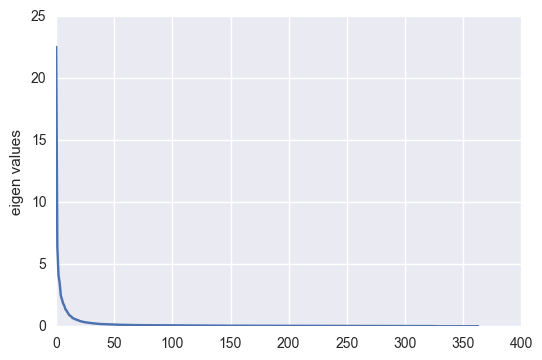

In [42]:
# draw eigen values
plt.plot( eigenValues )
plt.ylabel( "eigen values" )
plt.show()

In [74]:
# run cluster cosine
# eigenVals = np.array([0 for _ in range(number_sample)])
# eigenVects = np.array([ [0 for _ in range(number_sample)] for _ in range(number_sample)])

print(eigenVals.shape, eigenVects.shape)

cosRes = []

for i in range(2, 22):
#     eigenVals = eigenValues[:i]
    eigenVects = eigenVectors[:,:i]
    X, y = eigenVects, labels
    cosModel = AgglomerativeClustering(linkage="average", affinity="cosine")
    predictions = cosModel.fit_predict(X)
    diff_cos = (labels == predictions).astype(int)
    correct_rate = sum( diff_cos )/len( diff_cos )
    cosRes.append( correct_rate )
print(cosRes)

(2,) (364, 20)
[0.48351648351648352, 0.50824175824175821, 0.50274725274725274, 0.4175824175824176, 0.40109890109890112, 0.40109890109890112, 0.54120879120879117, 0.57417582417582413, 0.62637362637362637, 0.46703296703296704, 0.62912087912087911, 0.42032967032967034, 0.42307692307692307, 0.43406593406593408, 0.53021978021978022, 0.35714285714285715, 0.44230769230769229, 0.52197802197802201, 0.48901098901098899, 0.57967032967032972]


20 20


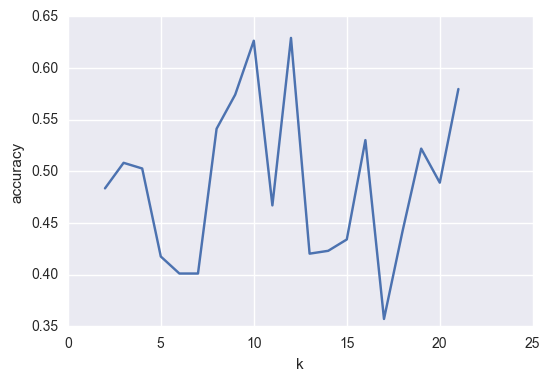

In [85]:
xrange = np.arange(2,22,1);
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(xrange, cosRes)
plt.show()

In [89]:
# run kmeans
kmeansRes = []

for i in range(2, 22):
#     eigenVals = eigenValues[:i]
    eigenVects = eigenVectors[:,:i]
    X, y = eigenVects, labels
    print(X.shape)
    kmeansModel = KMeans(n_clusters=2).fit(X)
    predictions = kmeansModel.labels_
    diff_kmeans = (labels == predictions).astype(int)
    correct_rate = sum( diff_kmeans )/len( diff_kmeans )
    kmeansRes.append( correct_rate )
print(kmeansRes)

(364, 2)
(364, 3)
(364, 4)
(364, 5)
(364, 6)
(364, 7)
(364, 8)
(364, 9)
(364, 10)
(364, 11)
(364, 12)
(364, 13)
(364, 14)
(364, 15)
(364, 16)
(364, 17)
(364, 18)
(364, 19)
(364, 20)
(364, 21)
[0.53846153846153844, 0.45604395604395603, 0.42857142857142855, 0.43681318681318682, 0.44780219780219782, 0.51373626373626369, 0.40109890109890112, 0.55769230769230771, 0.49725274725274726, 0.45604395604395603, 0.47802197802197804, 0.54395604395604391, 0.63736263736263732, 0.44230769230769229, 0.44505494505494503, 0.52472527472527475, 0.57417582417582413, 0.35714285714285715, 0.51923076923076927, 0.43681318681318682]


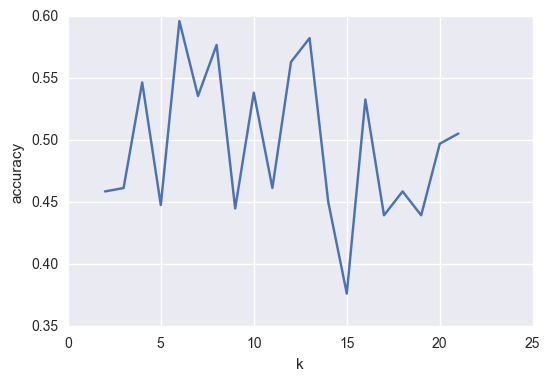

In [88]:
xrange = np.arange(2,22,1);
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(xrange, kmeansRes)
plt.show()